In [34]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd


data = load_iris()
X = data['data']
y = data['target']

# Scale the variables
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [26]:
class Model:
    """
    class for a Model vector. holds the vector and its sublist
    """

    def __init__(self, m_vector):
        self.m_vector = m_vector
        self.sublist = []
    
    def update_sublist(self, in_vector):
        self.sublist.append(in_vector)

In [27]:
def get_closest(in_vector, models):
    """
    returns index of closest model vector, given an input vector (from X) and a list containing model vector classes
    """
    closest = None
    closest_distance = 1e10
    for m_i, m in enumerate(models):
        distance = np.sqrt(np.sum((in_vector-models[m_i].m_vector)**2))
        if distance < closest_distance:
            closest_distance = distance
            closest = m_i
    return closest

In [28]:
# set h (radius) to close to unity in the beginning and decrease linearly/non-linearly afterwards
h = 1
reduction_factor = 0.99


# Randomly initialize M models, each of the same shape as X[0].
M = 20
models =[Model(np.random.random((X.shape[1]))) for i in range(M)]
#print(models)


iteration = 0
while h > 0.01:
    
    # in each iteration, use 20 random samples from X (instead of all) to update model vectors 
    rand_indices = np.random.randint(0, X.shape[0], 20)
    for index in rand_indices:
      closest = get_closest(X[index], models)

      for i, _i in enumerate(models):
        distance = np.sqrt(np.sum((models[i].m_vector-models[closest].m_vector)**2))
        if distance < h:
          models[i].m_vector += h*(X[index]-models[i].m_vector)

    h *= reduction_factor
    iteration += 1
    if iteration%50==0:
        print(iteration)

50
100
150
200
250
300
350
400
450


In [37]:
models = [m for m in models if np.isnan(m.m_vector).sum()==0]

In [43]:
temp=[get_closest(x_i, models) for x_i in X]
pd.Series(temp).value_counts()

0    100
5     50
dtype: int64

In [44]:
print(X.var(axis=0))
np.array([X[np.array(temp) == i].var(axis = 0).tolist() for i in np.unique(temp)])

[0.05255573 0.03276265 0.08892567 0.10019668]


array([[0.03356142, 0.01903056, 0.0193842 , 0.03101111],
       [0.00939537, 0.02444722, 0.00084907, 0.00188958]])

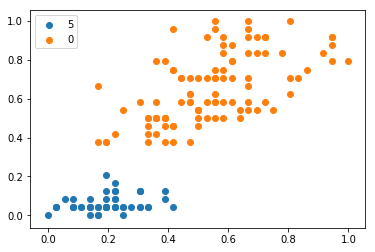

In [45]:
import matplotlib.pyplot as plt
from collections import defaultdict

temp=defaultdict(list)
for x_i in X:
  temp[get_closest(x_i, models)].append(x_i)

plt.figure()
for i in temp:
  t = np.array(temp[i])
  plt.scatter(t[:, 0], t[:, 3], label = i)

plt.legend()